# 1. Machine Learning Models on Original Data

This notebook implements some ML models in the original data.

## 1. Import Dependencies

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Load, Scale & Split the Data

In [20]:
# Load the x_minmax_scale dataset
X = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/features.csv")
X.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [34]:
# Load the target dataset
y = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/target_categorical.csv")

# Flatten y to convert it to a 1D array
y = y.values.flatten()

In [64]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [65]:
# Scale the features using MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range =(0,1))
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

## 3. Machine Learning Models

### 3.1. KNN Classifier

In [66]:
# Fit the Data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.52      0.67      0.58       181
   Dirtiness       0.65      0.79      0.71        28
    K_Scatch       0.95      0.93      0.94       201
Other_Faults       0.71      0.59      0.65       347
      Pastry       0.53      0.46      0.49        70
      Stains       0.63      0.89      0.74        35
   Z_Scratch       0.78      0.80      0.79       109

    accuracy                           0.71       971
   macro avg       0.68      0.73      0.70       971
weighted avg       0.72      0.71      0.71       971



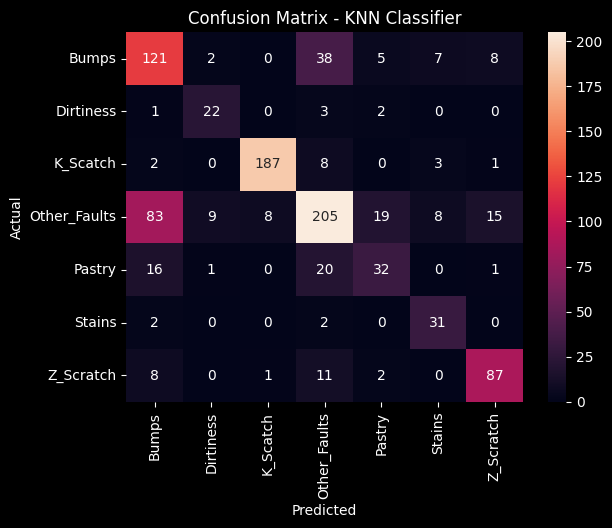

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

### 3.2. Random Forest

In [68]:
# Fit the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.68      0.67      0.68       181
   Dirtiness       0.81      0.79      0.80        28
    K_Scatch       0.97      0.94      0.95       201
Other_Faults       0.72      0.79      0.75       347
      Pastry       0.60      0.54      0.57        70
      Stains       0.94      0.91      0.93        35
   Z_Scratch       0.96      0.84      0.90       109

    accuracy                           0.79       971
   macro avg       0.81      0.78      0.80       971
weighted avg       0.79      0.79      0.79       971

